![](../img/330-banner.png)

Lecture 3: Machine Learning Fundamentals 
------------
UBC 2022-23 W2

Instructor: Amir Abdi

<img src="img_aa/iclicker_qr_code.png" height="300" width="300"> 
iclicker link

<br><br>

Announcements
-----------
- Look-out for HW2
  - Can work in groups of **up to 2**, and they should do a group submission on gradescope
- Students that joined the course late from waitlist:
  - We will re-open **syllabus quiz** and give them one week from the day they enroll to complete it.
  - We will **waive assignment 1** for those students
<br><br>

- [Last day to withdraw without a W standing](https://students.ubc.ca/enrolment/dates-deadlines#2022-23-winter-session-term-2): Jan 23, 2023
- **The prereq for 440 is 340**, and that's been set up that way by the team who designed 440 so that they can accomplish what they want to do with the course. If you'd like to take 440, you can definitely register for 340. It's possible to get credit for both 330 and 340.

-------------
- Advice on keeping up with the material 
    - **Practice!**
    - Make sure you run the lecture notebooks on your laptop. 
    - Start early on homework assignments.     


<br><br><br><br><br><br><br><br><br><br>

## Legends

| <img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/This_is_the_photo_of_Arthur_Samuel.jpg" width="100"> | <img src="http://www.cs.cmu.edu/~tom/TomHead2-6-22-22.jpg" width="100">  |
| ----------- | ----------- |
| Arthur Samuel       | Tom Mitchell       |
| (1901-1990)    | 1951 - Now       |
| First computer learning program | 1997 ML Texbook, CMU Prof |



<img src="https://upload.wikimedia.org/wikipedia/commons/4/49/John_McCarthy_Stanford.jpg" width="300">

- John McCarthy (1927 – 2011)
- American computer scientist and cognitive scientist
- One of the founders of the discipline of artificial intelligence
- Co-authored the document that coined the term "artificial intelligence" (AI)
- Developed the programming language family **Lisp** significantly influenced the design of the **language ALGOL**, popularized **time-sharing**
- invented **garbage collection**.

Watch this video to learn about his thought process as a cognitive scientist: https://www.youtube.com/watch?v=Ozipf13jRr4

<br><br><br><br><br><br><br><br><br><br>

# Learning outcomes

From this lecture, you will be able to 

Decision Boundaries:
- Learn about **Decision Boundaries**
- explain the concept of **decision boundaries**;
- explain the relation between model complexity and decision boundaries.
- explain how decision boundaries change with the `max_depth` hyperparameter;

Generalizability:
- explain the concept of **generalization**;
- appropriately split a dataset into **train and test** sets using `train_test_split` function;
- explain the difference between train, validation, test, and "deployment" data;
- identify the difference between training error, validation error, and test error;
- explain **cross-validation** and use `cross_val_score` and `cross_validate` to calculate cross-validation error;

Overfitting:
- recognize **overfitting** and/or **underfitting** by looking at train and test scores;
- explain why it is generally not possible to get a perfect test score (zero test error) on a supervised learning problem;
- describe the **fundamental tradeoff** between training score and the train-test gap (**bias/variance tradeoff**);
- state the golden rule;

Standard recipe for supervised learning:
- train/test split, 
- hyperparameter tuning with cross-validation on validation data, 
- test on test set.

<br><br><br><br><br><br><br>

Setup

In [1]:
# Some helper functions to save us time
import sys
sys.path.append("../code/.")

import glob
import matplotlib.pyplot as plt
from IPython.display import HTML
import pandas as pd
import numpy as np

plt.rcParams["font.size"] = 16
pd.set_option("display.max_colwidth", 200)

# Decision boundary 

What sort of test examples will the model classify as **positive**, and what sort will it classify as **negative**? 

## Example 1: quiz 2 grade prediction 

For visualization purposes, let's consider a subset of the data with only two features. 

In [2]:
from sklearn.tree import DecisionTreeClassifier

classification_df = pd.read_csv("../data/quiz2-grade-toy-classification.csv")
X = classification_df.drop(columns=["quiz2"])
y = classification_df["quiz2"]
model = DecisionTreeClassifier()
model.fit(X, y);

In [3]:
X_subset = X[["lab4", "quiz1"]]
X_subset.head()

,lab4,quiz1
0,91,92
1,83,91
2,80,80
3,91,89
4,92,85


##### Decision boundary for `max_depth=1` 

/Users/amirabdi/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


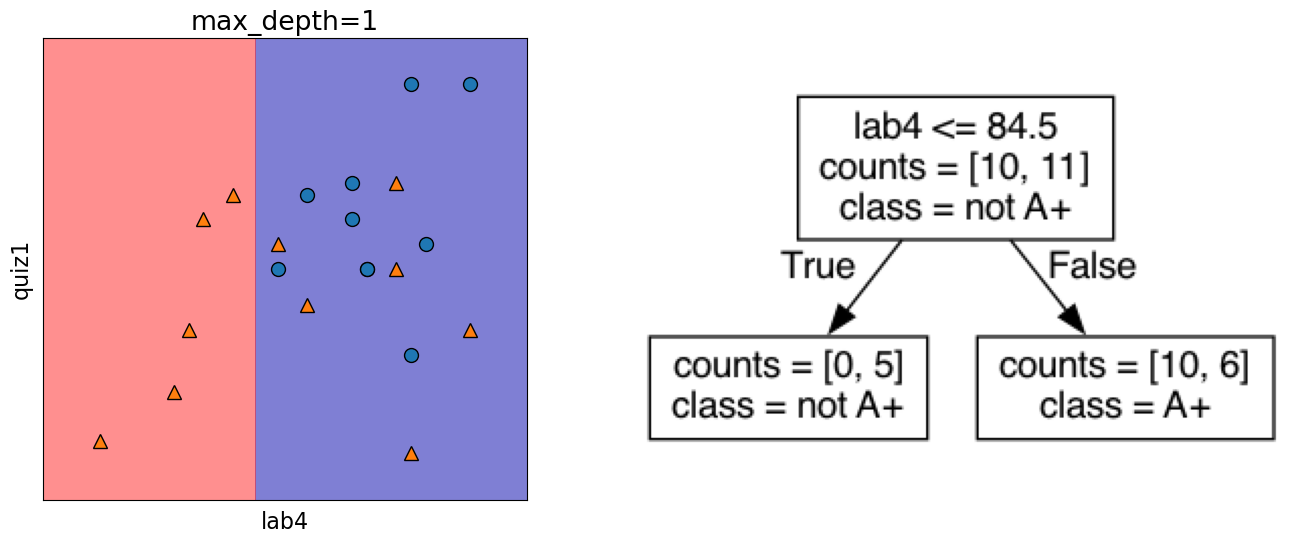

Score on Train Set: 0.7142857142857143


In [4]:
from plotting_functions import plot_tree_decision_boundary_and_tree
depth = 1  # decision stump
model = DecisionTreeClassifier(max_depth=depth)
model.fit(X_subset, y)
plot_tree_decision_boundary_and_tree(
    model, X_subset, y, x_label="lab4", y_label="quiz1"
)
print('Score on Train Set:', model.score(X_subset, y))

We assume geometric view of the data. Here, the red region corresponds to "not A+" class and blue region corresponds to "A+" class. And there is a line separating the red region and the blue region which is called the **decision boundary** of the model. Different models have different kinds of decision boundaries. 
In decision tree models, when we are working with only two features, the decision boundary is made up of horizontal and vertical lines. In the example above, the decision boundary is created by asking one question `lab4 <= 84.5`. 

##### Decision boundary for `max_depth=2` 

/Users/amirabdi/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


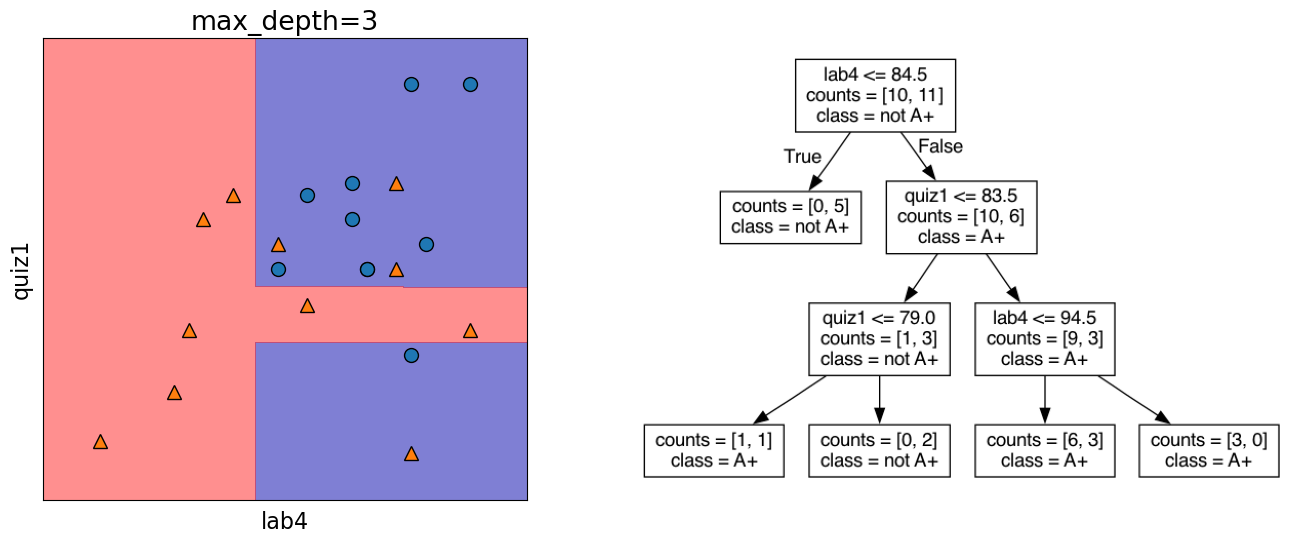

Score on Train Set: 0.8095238095238095


In [5]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_subset, y)
plot_tree_decision_boundary_and_tree(
    model, X_subset, y, x_label="lab4", y_label="quiz1"
)
print('Score on Train Set:', model.score(X_subset, y))

The decision boundary, i.e., the model gets a bit more complicated. 

##### Decision boundary for `max_depth=6` 

/Users/amirabdi/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


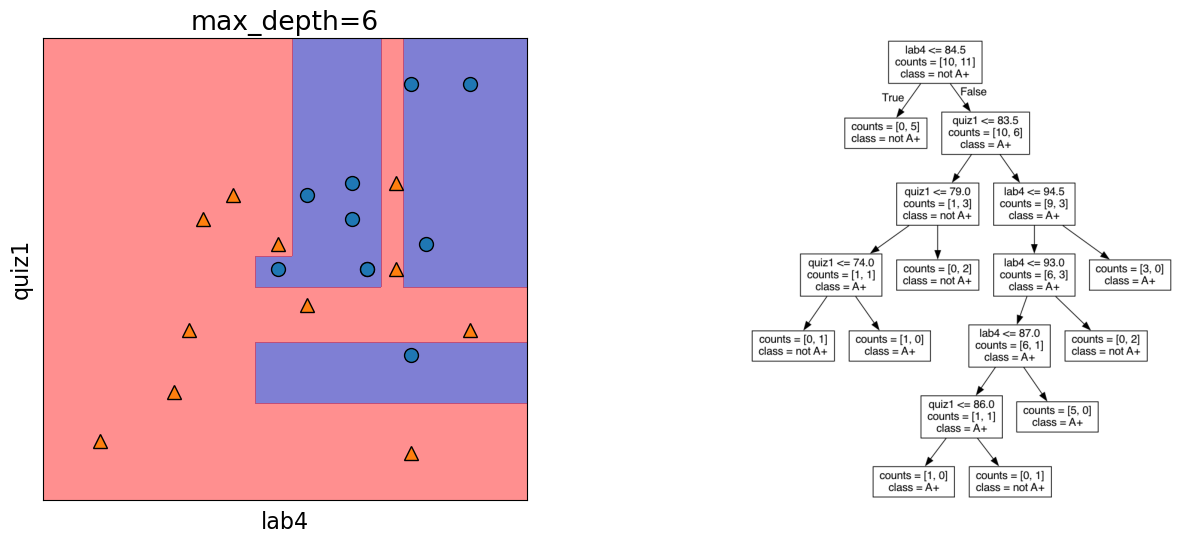

Score on Train Set: 1.0


In [6]:
model = DecisionTreeClassifier(max_depth=6)
model.fit(X_subset, y)
plot_tree_decision_boundary_and_tree(
    model, X_subset, y, x_label="lab4", y_label="quiz1"
)
print('Score on Train Set:', model.score(X_subset, y))

The decision boundary, i.e., the model gets even more complicated with `max_depth=6`. 

<br><br>

## Example 2: Predicting country using the longitude and latitude 

Imagine that you are given longitude and latitude of some border cities of USA and Canada along with which country they belong to. Using this training data, you are supposed to come up with a classification model to predict whether a given longitude and latitude combination is in the USA or Canada. 

In [7]:
### US Canada cities data
df = pd.read_csv("../data/canada_usa_cities.csv")
df

,longitude,latitude,country
0,-130.0437,55.9773,USA
1,-134.4197,58.3019,USA
2,-123.0780,48.9854,USA
3,-122.7436,48.9881,USA
4,-122.2691,48.9951,USA
...,...,...,...
204,-72.7218,45.3990,Canada
205,-66.6458,45.9664,Canada
206,-79.2506,42.9931,Canada
207,-72.9406,45.6275,Canada


In [8]:
X = df[["longitude", "latitude"]]
y = df["country"]

##### Real boundary between Canada and USA

In real life we know what's the boundary between USA and Canada. 


<img src="../img/canada-us-border.jpg" height="500" width="500"> 

[Source](https://sovereignlimits.com/blog/u-s-canada-border-history-disputes)

Here we want to pretend that we do not know this boundary and we want to infer this boundary based on the limited training examples given to us. 

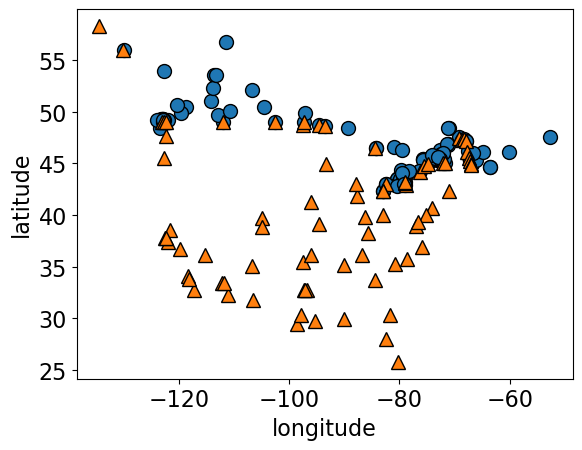

In [9]:
import mglearn
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.xlabel("longitude")
plt.ylabel("latitude");

/Users/amirabdi/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


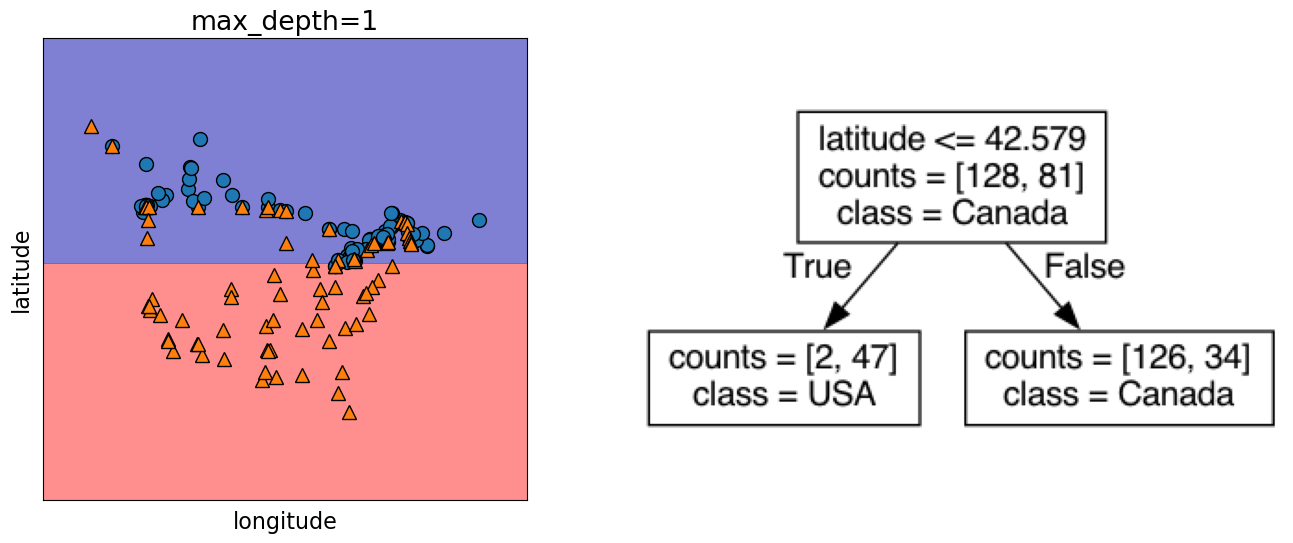

Score on Train Set: 0.8277511961722488


In [10]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X, y)
plot_tree_decision_boundary_and_tree(
    model,
    X,
    y,
    height=6,
    width=16,
    eps=10,
    x_label="longitude",
    y_label="latitude",
)
print('Score on Train Set:', model.score(X, y))

/Users/amirabdi/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


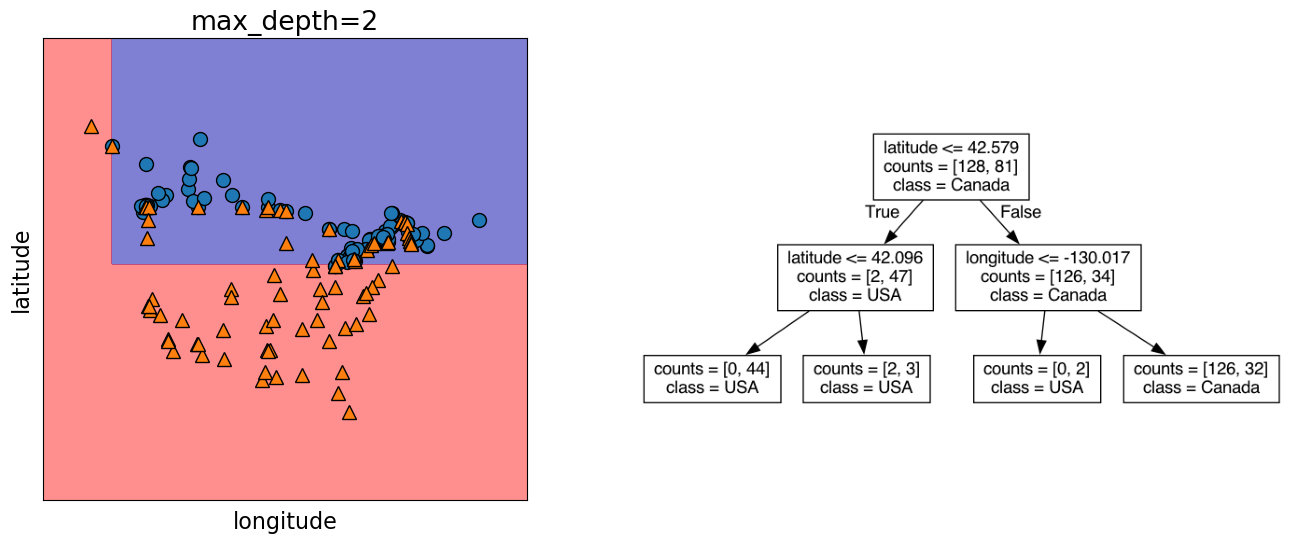

Score on Train Set: 0.8373205741626795


In [11]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y)
plot_tree_decision_boundary_and_tree(
    model,
    X,
    y,
    height=6,
    width=16,
    eps=10,
    x_label="longitude",
    y_label="latitude",
)
print('Score on Train Set:', model.score(X, y))

/Users/amirabdi/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


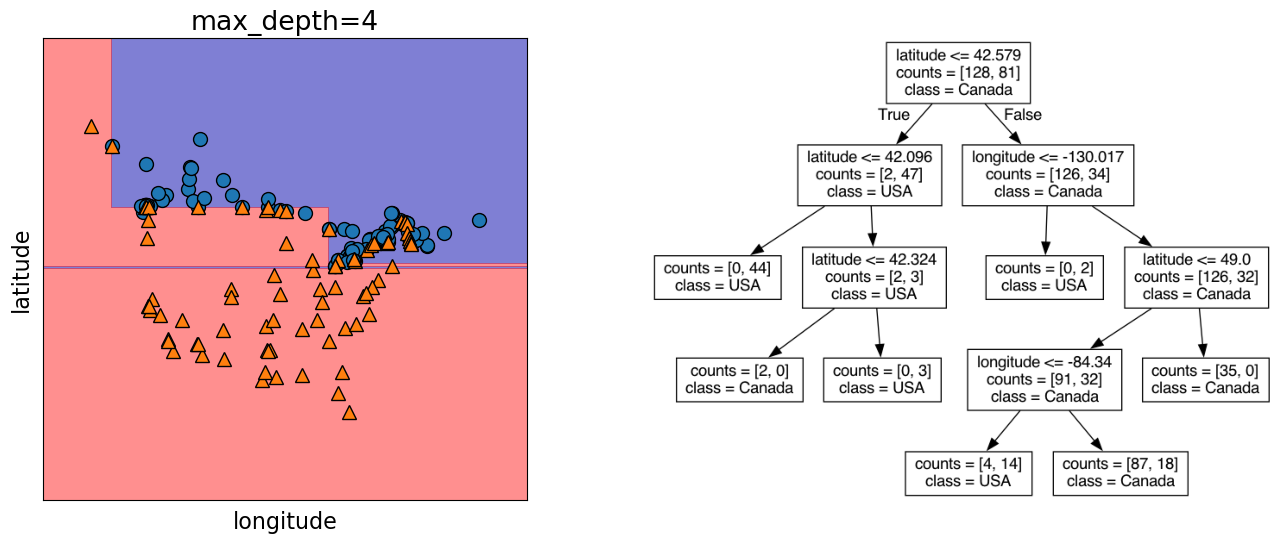

Score on Train Set: 0.8947368421052632


In [12]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X, y)
plot_tree_decision_boundary_and_tree(
    model,
    X,
    y,
    height=6,
    width=16,
    eps=10,
    x_label="longitude",
    y_label="latitude",
)
print('Score on Train Set:', model.score(X, y))

<br><br><br><br><br><br><br><br>
Decision Tree learn **axis-aligned decision boundaries**
- e.g. if only 2 features, vertical and horizontal lines
<br><br><br><br><br><br><br><br>

## Practice exercises 

If you want more practice, check out module 2 in [this online course](https://ml-learn.mds.ubc.ca/en/module2)  
Course is designed by Hayley Boyce, Mike Gelbart, and varada Kolhatkar as part of the Master of Data Science program at UBC.  
All the sections **without** video or notes symbol are exercises.  

<br><br>

<br><br><br><br>

<br><br>

<br><br><br><br>

# Generalization [[video](https://youtu.be/iS2hsRRlc2M)]

## Big picture and motivation 

In machine learning we want to learn a mapping function from labeled data so that we can predict labels of **unlabeled** data. For example, suppose we want to build a spam filtering system.  We will take a large number of spam/non-spam messages from the past, learn patterns associated with spam/non-spam from them, and predict whether **a new incoming message** in someone's inbox is spam or non-spam based on these patterns. 

So we want to learn from the past but ultimately we want to apply it on the future email messages. 

![](../img/eva-think.png)

How can we **generalize** from what we have **seen** to what we haven't **NOT seen**?

In this lecture, we'll see how machine learning tackles this question. 

## Model complexity and training error

Let's examine how **training error** changes with respect to **model complexity**

Some Hyper-parameters in Decision Trees that can define model complexity (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)):
- max_depth
- **max_leaf_nodes**
- min_impurity_decrease
- min_samples_split
- min_samples_leaf

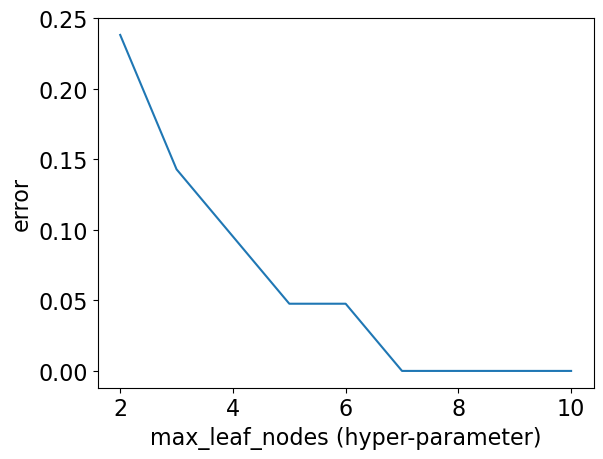

In [13]:
classification_df = pd.read_csv("../data/quiz2-grade-toy-classification.csv")
X = classification_df.drop(columns=["quiz2"])
y = classification_df["quiz2"]

max_leaf_nodes_list = np.arange(2, 11)
errors = []
for max_leaf_nodes in max_leaf_nodes_list:
    error = 1 - (
        DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes).
        fit(X, y).
        score(X, y)
    )
    errors.append(error)
    
plt.plot(max_leaf_nodes_list, errors)
plt.xlabel("max_leaf_nodes (hyper-parameter)")
plt.ylabel("error");

- Our model has ** ZREO (0) Train error** for `max_leaf_nodes >= 7`
- But it's also becoming more and more **specific** and  **sensitive** to the training data.  
- **Is it good or bad?**

```{admonition} Note 
:class: note
Although the plot above (complexity hyperparameter vs error) is more popular, we could also look at the same plot flip the $y$-axis, i.e., consider accuracy instead of error. 
```

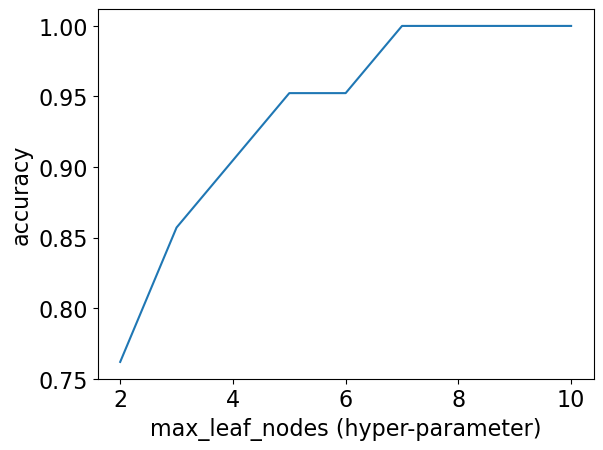

In [14]:
# error = 1 - accuracy
# accuracy = 1 - error
accuracies = 1 - np.array(errors)

plt.plot(max_leaf_nodes_list, accuracies)
plt.xlabel("max_leaf_nodes (hyper-parameter)")
plt.ylabel("accuracy");

### 🤔 Eva's questions

![](../img/eva-think.png)


At this point Eva is wondering about the following questions. 

- How to pick the best depth? 
- How can we make sure that the model we have built would do reasonably well on new data in the wild when it's **deployed**? 
  - what does **deploy** mean?

<br><br><br><br>

## Generalization: Fundamental goal of ML

> To **generalize** beyond what we see in the **training examples**

We only have access to limited amount of training data and we want to learn a mapping function which would predict targets reasonably well for examples beyond this training data. 

- Example: Imagine that a learner sees the following images and corresponding labels. 

<center>
<img src='../img/generalization-train.png' width="600" height="600" />
</center>    

### Generalizing to unseen data

- Now the learner is presented with new images (1 to 4) for prediction. 
- What prediction would you expect for each image?   


<center>
<img src='../img/generalization-predict.png' width="1000" height="1000" />
</center>    

- Goal: We want the learner to be able to generalize beyond what it has seen in the training data.
- But these new examples should be representative of the training data. 
 - That is they should have the same characteristics as the training data. 
   - They should have been **sampled from the same distribution**
- In this example, we would like the leaner to be able to predict labels for test examples 1, 2, and 3 accurately. Although 2, 3 don't exactly occur in the training data, they are very much similar to the images in the training data. 
  - **Is it fair to expect** the learner to label image 4 correctly? 

### Training error vs. Generalization error 

- Given a model $M$, in ML, people usually talk about two kinds of errors of $M$. 
    1. Error on the training data: 
       - $error_{training}(M)$ 
    2. Error on the entire distribution $D$ of data: 
       - $error_{D}(M)$
- We are interested in the error on the **entire distribution**

<br><br><br><br><br><br>
Train Data (and similarly Test Data) is **sampled** from the target **distribution** 

**General Assumption of Machine Learning:**
Train Data, Validation Data and Test Data are **assumed** to have been sampled from the same **distribution**
<br><br><br><br><br><br>

<br><br><br><br>

## Data Splitting [[video](https://youtu.be/h2AEobwcUQw)]

### How to approximate generalization error? 

A common way is **data splitting**. 
- **Keep aside** some randomly selected portion from the training data; call it **test data**
- `fit` (train) a model on the training portion only. 
- `score` (evaluate) the trained model on this set aside data to get a sense of how well the model would be able to generalize.

![](../img/eva-good-idea.png)

In [15]:
# scikit-learn train_test_split
url = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html"
HTML("<iframe src=%s width=1000 height=800></iframe>" % url)

/Users/amirabdi/miniconda3/envs/cpsc330/lib/python3.10/site-packages/IPython/core/display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


- We can pass `X` and `y` or a dataframe with both `X` and `y` in it. 
- We can also specify the train or test split sizes. 

### Simple train/test split 

- The picture shows an 80%-20% split of a toy dataset with 10 examples. 
- The data is shuffled before splitting. 
- Usually when we do machine learning we split the data before doing anything and put the test data in an imaginary chest lock. 


<img src='../img/train-test-split.png' width="1500" height="1500" />

In [16]:
# Let's demonstrate this with the canada usa cities data
# The data is available in the data directory
df = pd.read_csv("../data/canada_usa_cities.csv")
X = df.drop(columns=["country"])
y = df["country"]

In [17]:
X

,longitude,latitude
0,-130.0437,55.9773
1,-134.4197,58.3019
2,-123.0780,48.9854
3,-122.7436,48.9881
4,-122.2691,48.9951
...,...,...
204,-72.7218,45.3990
205,-66.6458,45.9664
206,-79.2506,42.9931
207,-72.9406,45.6275


In [18]:
y

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
204    Canada
205    Canada
206    Canada
207    Canada
208    Canada
Name: country, Length: 209, dtype: object

In [19]:
from sklearn.model_selection import train_test_split

# 80%-20% train test split on X and y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123,
)  

# Print shapes
shape_dict = {
    "Data portion": ["X", "y", "X_train", "y_train", "X_test", "y_test"],
    "Shape": [
        X.shape,
        y.shape,
        X_train.shape,
        y_train.shape,
        X_test.shape,
        y_test.shape,
    ],
}

shape_df = pd.DataFrame(shape_dict)
HTML(shape_df.to_html(index=False))

Data portion,Shape
X,"(209, 2)"
y,"(209,)"
X_train,"(167, 2)"
y_train,"(167,)"
X_test,"(42, 2)"
y_test,"(42,)"


### Question for you
Why do we set the `random_state=123` in the above code?
<br><br><br><br><br><br><br><br>

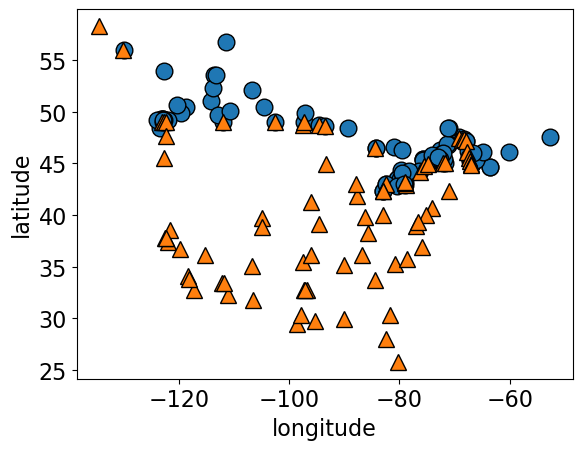

In [20]:
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y, s=12)
plt.xlabel("longitude")
plt.ylabel("latitude");

Let's train the model and evaluate **train and test accuracies** with the split now.

In [21]:
model = DecisionTreeClassifier(max_depth=12)
model.fit(X_train, y_train)

print("Train accuracy:   %0.3f" % model.score(X_train, y_train))
print("Test accuracy:   %0.3f" % model.score(X_test, y_test))

Train accuracy:   1.000
Test accuracy:   0.738


/Users/amirabdi/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


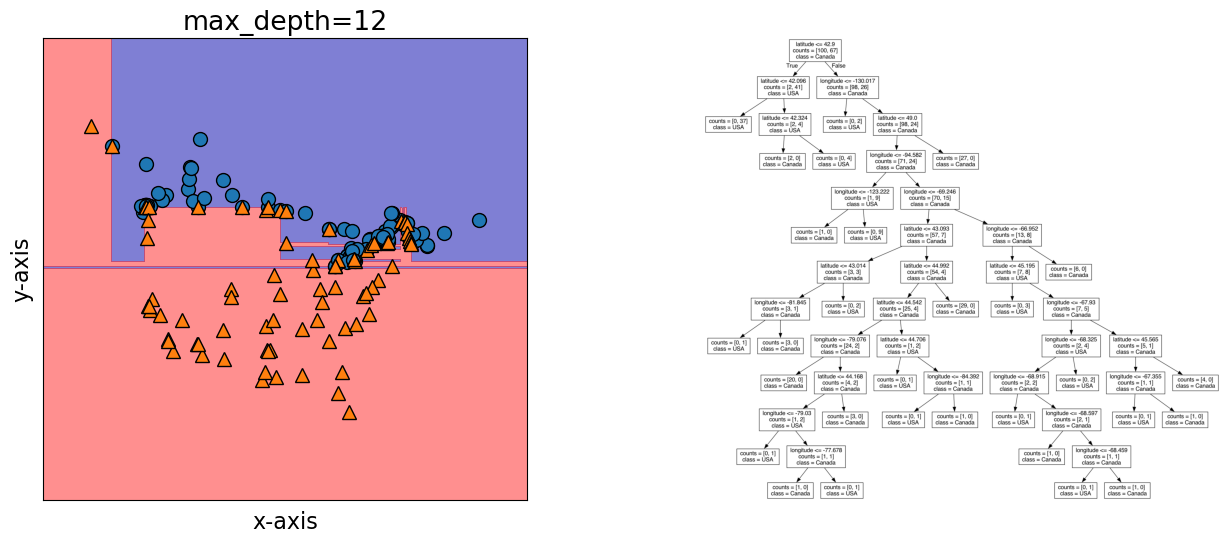

In [22]:
from plotting_functions import plot_tree_decision_boundary

plot_tree_decision_boundary_and_tree(model, X, y, height=6, width=16, eps=10)

/Users/amirabdi/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/amirabdi/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


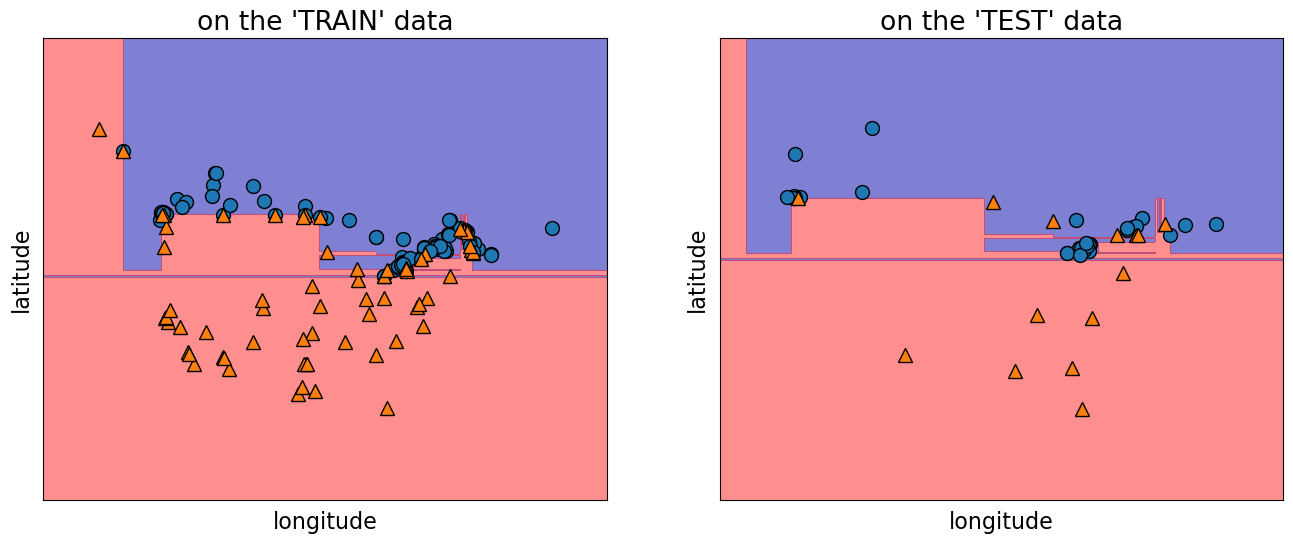

In [23]:
from plotting_functions import plot_tree_decision_boundary

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={"xticks": (), "yticks": ()})
plot_tree_decision_boundary(
    model,
    X_train,
    y_train,
    eps=10,
    x_label="longitude",
    y_label="latitude",
    ax=ax[0],
    title="on the 'TRAIN' data",
)
plot_tree_decision_boundary(
    model,
    X_test,
    y_test,
    eps=10,
    x_label="longitude",
    y_label="latitude",
    ax=ax[1],
    title="on the 'TEST' data",
)

- Useful arguments of `train_test_split`: 
    - `test_size`
    - `train_size` (complement of `test_size`)
    - `random_state`

- `random_state` argument

  - The data is **randomly shuffled** before splitting which is crucial step. (You will explore this in the lab.) 
  - The `random_state` argument **controls** this shuffling to make the shuffling **reproducible**  
  - In the example above we used `random_state=123`. If you run this notebook with the same `random_state` it should give you exactly the same split. 

### Train/validation/test split


Sometimes it's a good idea to have a **separate data**. We call that **Validation Data** (rarely called Dev Data).  
**"Validation Data"** is similar to **"Test Data"**, but, with a different purpose.

Validation Data:
- **hyperparameter tuning**,
- **iterating over the solution (model choice, model design, data, etc.)**,
- To **assert that the model is correctly training**.

Test Data:
  - We only use it **once** to evaluate the performance of the **best performing model**
  - We lock it in a "vault", and "**never ever look at it**" until we're ready to evaluate. 


<img src='../img/train-valid-test-split.png' width="1500" height="1500" />

<br><br><br><br><br><br><br><br>


### "Deployment (Production)" data

- After we build and finalize a model, we deploy it, and then the model deals with the data in the wild. 
- We will use "deployment" to refer to this data, where we do **not** have access to the target values.
- Deployment error (error on Production data) is what we _really_ care about.
- We use **test error** as a **proxy** for **deployment error**, and we hope they are similar.
  - So, if our model does well on test data, we hope it will do well on deployment data. 
    - Why?

<br><br><br><br><br><br><br><br><br>
**Because** 
In General we assume Train, Validation, Test and Deployment data are all sampled from the **same distribution**.

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<center>
<img src='../img/golden_rule_violation.png' width="500" height="500" />
</center>    

 
<blockquote>
   ... He attempted to reproduce the research, and found a major flaw: there was some overlap in the data used to both train and test the model. 
</blockquote>    


<br><br><br><br><br><br><br><br>

### Summary of train, validation, test, and deployment data

|         | `fit` | `score` | `predict` |
|----------|-------|---------|-----------|
| Train    | ✔️      | ✔️ <br>(but we don't care)     | ✔️         |
| Validation |      | ✔️      | ✔️         |
| Test    |       |  once<br>(as little as possible)   | once<br>(as little as possible)         |
| Deployment    |       |       | ✔️         |


You can typically expect the following statistics on **error** to hold:   
$E_{train} < E_{validation} < E_{test} < E_{deployment}$.

## ❓❓ Questions for you

### iClicker Exercise 3.1 

**iClicker cloud join link: https://join.iclicker.com/EMMJ**

**Select all of the following statements which are TRUE.**

- (A) A decision tree model with no `max_depth` HParam is likely to perform very well on the deployment data. 
- (B) Data splitting helps us assess how well our model would generalize. 
- (C) We have access to deployment data during modeling.
- (D) Validation data could be used for hyperparameter optimization. 
- (E) It's recommended that data be shuffled before splitting it into `train` and `test` sets.


<br><br><br><br>

## Break (5 min)

![](../img/eva-coffee.png)


## Cross-validation [[video](https://youtu.be/4cv8VYonepA)]

### What if you had small dataset?

What if you couldn't partition data into **Train/Valid/Test** because, for example, Validation set would be very small?

<img src='../img/train-valid-test-split.png' width="1500" height="1500" />

### Cross-validation to the rescue!! 

- Cross-validation provides a solution to this problem. 
- Split the data into $k$ folds ($k>2$, often $k=10$). 
  - **In the picture below $k=4$**, hence, **4-Fold cross-validation**
- Each "fold" gets a turn at being the validation set.

<img src='../img/cross-validation.png' width="1500">

- Each fold gives a score
- **We end up with k scores**
  - we **average** $k$ scores to report the final **validation score**
- It's better to examine the variation in the scores across folds.  
- Gives a more **robust** measure of error on unseen data.

### Cross-validation using `scikit-learn`

In [24]:
from sklearn.model_selection import cross_val_score

In [25]:
model = DecisionTreeClassifier(max_depth=4)
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
cv_scores

array([0.76470588, 0.82352941, 0.70588235, 0.94117647, 0.82352941,
       0.82352941, 0.70588235, 0.9375    , 0.9375    , 0.9375    ])

----------
Notice that we only send **Train** data to CrossValidation, and under-the-hood the library is splitting that into **Train/Valid** sets.

----------

In [26]:
print(f"Average cross-validation score = {np.mean(cv_scores):.2f}")
print(f"Standard deviation of cross-validation score = {np.std(cv_scores):.2f}")

Average cross-validation score = 0.84
Standard deviation of cross-validation score = 0.09


Under the hood

- It creates `cv` folds on the data.
- In each fold, it fits the model on the training portion and scores on the validation portion. 
- The output is a list of validation scores in each fold.

#### `cross_validate`

- Similar to `cross_val_score` but more powerful.
- Gives us access to training and validation scores + time it took to train (fit) and evaluate for each fold
- **Test it yourself!**

In [27]:
from sklearn.model_selection import cross_validate

# Students code here after the class to learn about cross_validate 
# 
# 

Note: In Sklearn, `cross_validate`, and `cross_val_score` don't shuffle the data. Make sure you shuffle the data yourself.

## [Bonus Content] Stratified Cross-Validation

- Learn about Stratified Sampling [here](https://www.scribbr.com/methodology/stratified-sampling/#:~:text=What%20is%20stratified%20sampling%3F,using%20another%20probability%20sampling%20method.)
- Read about this function in Sklearn here: [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)

![stratified-sampling](https://cdn.scribbr.com/wp-content/uploads/2020/09/stratified-sample-7.png)



# Typical supervised learning set up

- We are given training data with features `X` and target `y`
- We **split** the data into **train** and **test** portions
- **train** is later partitioned into **train** and **validation** sets
- We carry out **hyperparameter optimization** by training on **train** set and evaluating on **validation** set.
- We assess our **best performing model** on the **test** set
- What we care about is the **test error**, which tells us how well our model can be generalized.
- If this test error is "acceptable" we deploy the model which will be used on new unseen examples.

```{admonition} Exercise 3.3: Cross-validation

```

# Underfitting, overfitting, the fundamental trade-off, the golden rule [[video](https://youtu.be/Ihay8yE5KTI)]

## Types of errors

Imagine that your train and validation errors do not align with each other. How do you diagnose the problem?  

We're going to think about 4 types of errors:

- $E_\textrm{train}$ is your training error (or mean train error from cross-validation).
- $E_\textrm{valid}$ is your validation error (or mean validation error from cross-validation).
- $E_\textrm{test}$ is your test error.
- $E_\textrm{best}$ is the **assumed best possible error** you could get for a given problem.

## Underfitting (model not complex enough | High Bias)

In [28]:
model = DecisionTreeClassifier(max_depth=1)  # decision stump
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
print("Train error:   %0.3f" % (1 - np.mean(scores["train_score"])))
print("Validation error:   %0.3f" % (1 - np.mean(scores["test_score"])))  # it says `test_score`, but here, it means `validation score`

Train error:   0.166
Validation error:   0.190


- If your model is too simple, like `DummyClassifier` or `DecisionTreeClassifier` with `max_depth=1`, it's not going to pick up on some random quirks in the data but it won't even capture useful patterns in the training data.
- The model won't be very good in general. Both train and validation errors would be high. This is **underfitting**.
- The gap between train and validation error is going to be lower.
  - $E_\textrm{best} \lt E_\textrm{train} \lesssim E_\textrm{valid}$

## Overfitting (model too complex | High Variance)

In [29]:
model = DecisionTreeClassifier(max_depth=None)
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
print("Train error:   %0.3f" % (1 - np.mean(scores["train_score"])))
print("Validation error:   %0.3f" % (1 - np.mean(scores["test_score"])))

Train error:   0.000
Validation error:   0.185


- If your model is very complex, like a `DecisionTreeClassifier(max_depth=None)`, then you will learn unreliable patterns in order to get every single training example correct.
- The training error is going to be very low but there will be a big gap between the training error and the validation error. This is **overfitting**.
- In overfitting scenario, usually we'll see: 
  - $E_\textrm{train} \lt E_\textrm{best}  \lt E_\textrm{valid}$


**In over-fitting, "validation error" does not  decrease with the "training error".**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
results_dict = {
    "max_depth": [],
    "train_error": [],
    "validation_error": [],
    "std_cv_error": [],
    "std_train_error": [],
}
param_grid = {"max_depth": np.arange(1, 16)}

for depth in param_grid["max_depth"]:
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["max_depth"].append(depth)
    results_dict["validation_error"].append(1 - np.mean(scores["test_score"]))
    results_dict["train_error"].append(1 - np.mean(scores["train_score"]))
    results_dict["std_cv_error"].append(scores["test_score"].std())
    results_dict["std_train_error"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("max_depth")

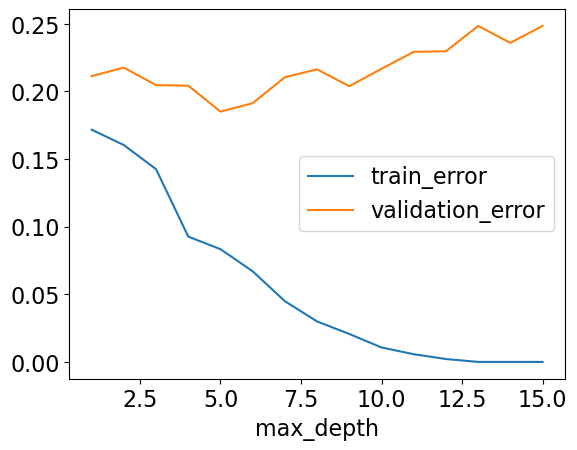

In [31]:
results_df[["train_error", "validation_error"]].plot();

- Here, for larger depths we observe that the training error is close to 0 but validation error goes up and down. 
- As we make more complex models we start encoding random quirks in the data, which are not grounded in reality.  
- These random quirks do not generalize well to new data. 
- This problem of failing to be able to generalize to the validation data or test data is called **overfitting**.

## Fundamental Tradeoff: Bias vs Variance tradeoff 

**Bias**
: the tendency in consistently **making the same mistake** (high bias corresponds to underfitting)

**Variance** 
: the tendency to learn noise (memorize) data irrespective of the real signal (high variance corresponds to overfitting)

**Why is it called Variance?**
- if the training data changes, the model would drastically change, so, the **Variance of Model with respect to the data is high**



Check out [this article by Pedro Domingos](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf) for some more explanation of the bias-variance tradeoff. 


### How to pick a model that would generalize better?

- We want to avoid both underfitting and overfitting. 
- We want to be consistent with the training data but we don't to rely too much on it. 

<!-- <center>
<img src='../img/malp_0201.png' width="800" height="800" />
</center>    
 -->
![](../img/malp_0201.png)

[source](https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/ch02.html#relation-of-model-complexity-to-dataset-size)

- There are many subtleties here and there is no perfect answer but a  common practice is to pick the model with minimum cross-validation error. 

In [32]:
results_df

,train_error,validation_error,std_cv_error,std_train_error
max_depth,,,,
1,0.171657,0.211250,0.048378,0.006805
2,0.160258,0.217500,0.048940,0.007316
3,0.142467,0.204583,0.053763,0.022848
4,0.092604,0.204167,0.070907,0.006531
5,0.083338,0.185000,0.064205,0.010650
6,0.066960,0.191250,0.072707,0.012065
7,0.044873,0.210417,0.089136,0.009059
8,0.029909,0.216250,0.088397,0.009422
9,0.020653,0.203750,0.091524,0.010294


In [33]:
best_depth = results_df.index.values[np.argmin(results_df["validation_error"])]
print(
    "The minimum validation error is %0.3f at max_depth = %d "
    % (
        np.min(results_df["validation_error"]),
        best_depth,
    )
)

The minimum validation error is 0.185 at max_depth = 5 


### test score vs. validation (cross-validation) score

- Let's pick `max_depth`= 5 and try this model on the test set. 

In [34]:
model = DecisionTreeClassifier(max_depth=best_depth)
model.fit(X_train, y_train)
print(f"Error on test set: {1 - model.score(X_test, y_test):.2f}")

Error on test set: 0.19


- The **test error** is comparable with the **validation (cross-validation) error**. 
- Do we feel confident that this model would give similar performace when deployed? 

<br><br><br><br><br><br><br>
### The Golden Rule <a name="4"></a>


**The TEST DATA CANNOT influence the "TRAINING and MODLEING PHASE"**. 


- We have to be very careful not to violate it while developing our ML pipeline. 
- Even experts end up breaking it sometimes which leads to misleading results and lack of generalization on the real data. 

<br><br><br><br><br><br><br><br>

------------------------------------------------
------ Everytime you look at the Test data you are **over-fitting to the test data** ----------

**If you evaluate your model on Test data too many times, you are practically cheating.**

------------------------------------------------

<br><br><br><br><br><br><br><br>

### Golden rule violation:

There is an ongoing famous image recognition benchmark challenge called **ImageNet** (https://www.image-net.org/)

<center>
<img src='../img/golden_rule_violation_2.png' width="500" height="500" />
</center>    

 

<blockquote>
  ... The Challenge rules state that you must only test your code twice a week, because there’s an element of chance to the results. Baidu has admitted that it used multiple email accounts to test its code roughly 200 times in just under six months – over four times what the rules allow.
</blockquote>

Read more [here](https://www.technologyreview.com/2015/06/04/72951/why-and-how-baidu-cheated-an-artificial-intelligence-test/)

### Here is the workflow we'll generally follow. 

- **Splitting**: Before doing anything, split the data `X` and `y` into `X_train`, `X_test`, `y_train`, `y_test` or `train_df` and `test_df` using `train_test_split`. 
- **Select the best model using cross-validation** 
  - sweet-spot with best bias/variance tradeoff
- **Scoring on test data**: Finally score on the test data with the chosen hyperparameters to examine the generalization performance.


<br><br><br><br>

## ❓❓ Questions for you

### iClicker Exercise 3.2 

**iClicker cloud join link: https://join.iclicker.com/EMMJ**

**Select all of the following statements which are TRUE.**

- (A) $k$-fold cross-validation calls fit $k$ times.
- (B) We use cross-validation to get a more robust estimate of model performance.
- (C) If the mean train accuracy is much higher than the mean validation accuracy it's likely to be a case of overfitting.
- (D) The fundamental bias/variance tradeoff of ML states that a model with extremely good performance on train data would fail on validation data.
- (E) A decision stump on a complicated classification problem is likely to underfit. 


<br><br>

## Summary and reflection

### What did we learn today?

- **Decision boundaries** and how it relates to model complexity
- Importance of **generalization** in supervised machine learning 
- **Data splitting** as a way to approximate **generalization error**
- **Train, test, validation, deployment data**
  - Cross-validation
- A typical sequence of steps to train supervised machine learning models
- **Overfitting**, **underfitting**, the **fundamental tradeoff**, and the **golden rule**.   

### Reflection

Write your reflections (takeaways, struggle points, and general comments) on this material in [the reflection Google Document](https://docs.google.com/document/d/1nxULx7x1vypTLfSbXGH8ONJQAYxk2IoSRKdb4iltixY/edit?usp=sharing) 

- This is a collaborative GoogleDoc where you all have edit access.
- I'll try to address those points in the next lecture. 

### Coming up ...  

- KNNs, SVM RBFs 
- Preprocessing
    - Imputation
    - Scaling
    - One-hot encoding
    - `sklearn` pipelines

![](../img/eva-seeyou.png)